## Setup

In [1]:
from matplotlib import pyplot as plt

from tailestim import TailData
from tailestim import HillEstimator, KernelTypeEstimator, MomentsEstimator
from tailestim import TailEstimatorSet

## Estimation

In [2]:
# Load a built-in dataset
data = TailData(name='Pareto').data
# data = TailData(name='Libimseti_in_KONECT').data

In [3]:
# Example of loading a custom dataset
# custom_data = TailData(path='path/to/my/data.dat').data

In [4]:
# Initialize and fit the Hill estimator
estimator = HillEstimator(base_seed=None)
estimator.fit(data)
print(estimator)

--------------------------------------------------
Estimator Type: HillEstimator
--------------------------------------------------
Fitted: Yes
Arguments:
  bootstrap: True
  base_seed: None



In [5]:
# Get the parameters provided to estimators as dictionary
estimator.get_params()

{'base_seed': None,
 'bootstrap': True,
 't_bootstrap': 0.5,
 'r_bootstrap': 500,
 'eps_stop': 0.99,
 'verbose': False,
 'diagn_plots': False}

In [ ]:
# Get estimated values
result = estimator.get_result()

In [7]:
# Get the power law exponent
gamma = result.gamma_

In [8]:
# Print full results
print(result)

--------------------------------------------------
Result
--------------------------------------------------
Estimator: HillEstimator
Tail index (ξ): 0.6713
Power law exponent (γ): 2.4897
Order statistics: Array of shape (4999,) [1.0000, 2.0000, 3.0000, ...]
Tail index estimates: Array of shape (4999,) [0.6348, 0.4956, 1.3779, ...]
Optimal order statistic (k*): 4366
Bootstrap Results: 
  First Bootstrap: 
    Minimum AMSE fraction: 0.9270
    AMSE values: None
    Maximum index: 3499
    Fraction of order statistics: None
  Second Bootstrap: 
    Minimum AMSE fraction: 0.9840
    AMSE values: None
    Maximum index: 2473
    Fraction of order statistics: None


## Comparison of estimators

In [9]:
# Compare different estimators and plot results
estim_set = TailEstimatorSet(
    base_seed=None,
    diagnostic_plots=True # This has to be true to run plot_diagnostics()
)

In [10]:
estim_set.fit(data)

/Users/minami/Developer/tailestim/src/tailestim/estimators/tail_methods.py:164: RuntimeWarning: invalid value encountered in divide
  clean_indices = np.where((M2 <= 0) | (M3 == 0) | (np.abs(1.-(M1**2)/M2) < 1e-10)\
/Users/minami/Developer/tailestim/src/tailestim/estimators/tail_methods.py:165: RuntimeWarning: invalid value encountered in divide
  |(np.abs(1.-(M1*M2)/M3) < 1e-10))
/Users/minami/Developer/tailestim/src/tailestim/estimators/tail_methods.py:165: RuntimeWarning: divide by zero encountered in divide
  |(np.abs(1.-(M1*M2)/M3) < 1e-10))
/Users/minami/Developer/tailestim/src/tailestim/estimators/tail_methods.py:741: RuntimeWarning: invalid value encountered in divide
  xi_arr = gamma_pos -1. + q2/q1
/Users/minami/Developer/tailestim/src/tailestim/estimators/tail_methods.py:804: RuntimeWarning: invalid value encountered in divide
  xi_arr = gamma_pos - 1. + q2/q1


TailEstimatorSet(data_length=5000)

In [11]:
estim_set.get_params()

{'data_length': 5000,
 'number_of_bins': 30,
 'r_smooth': 2,
 'alpha': 0.6,
 'hsteps': 200,
 'bootstrap_flag': True,
 't_bootstrap': 0.5,
 'r_bootstrap': 500,
 'diagnostic_plots': True,
 'eps_stop': 1.0,
 'theta1': 0.01,
 'theta2': 0.99,
 'verbose': False,
 'noise_flag': True,
 'p_noise': 1,
 'savedata': False,
 'base_seed': None}

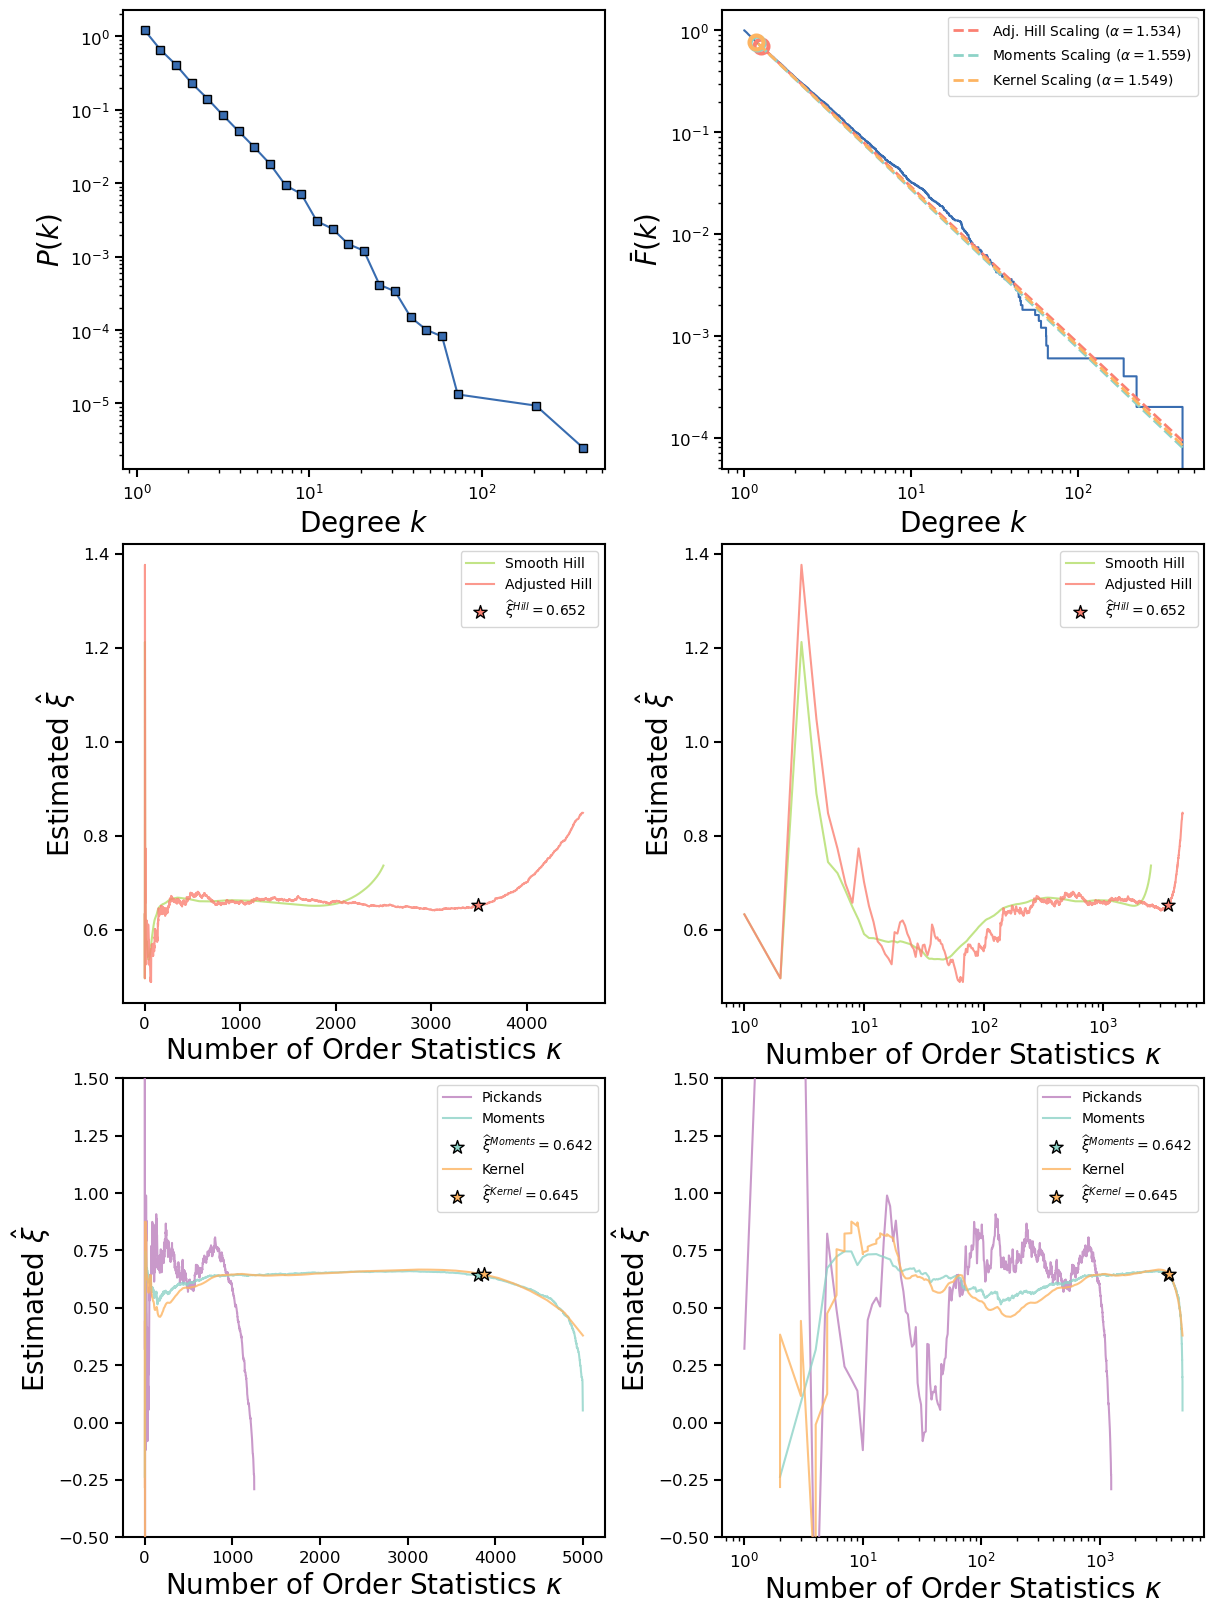

In [12]:
estim_set.plot()
plt.show()

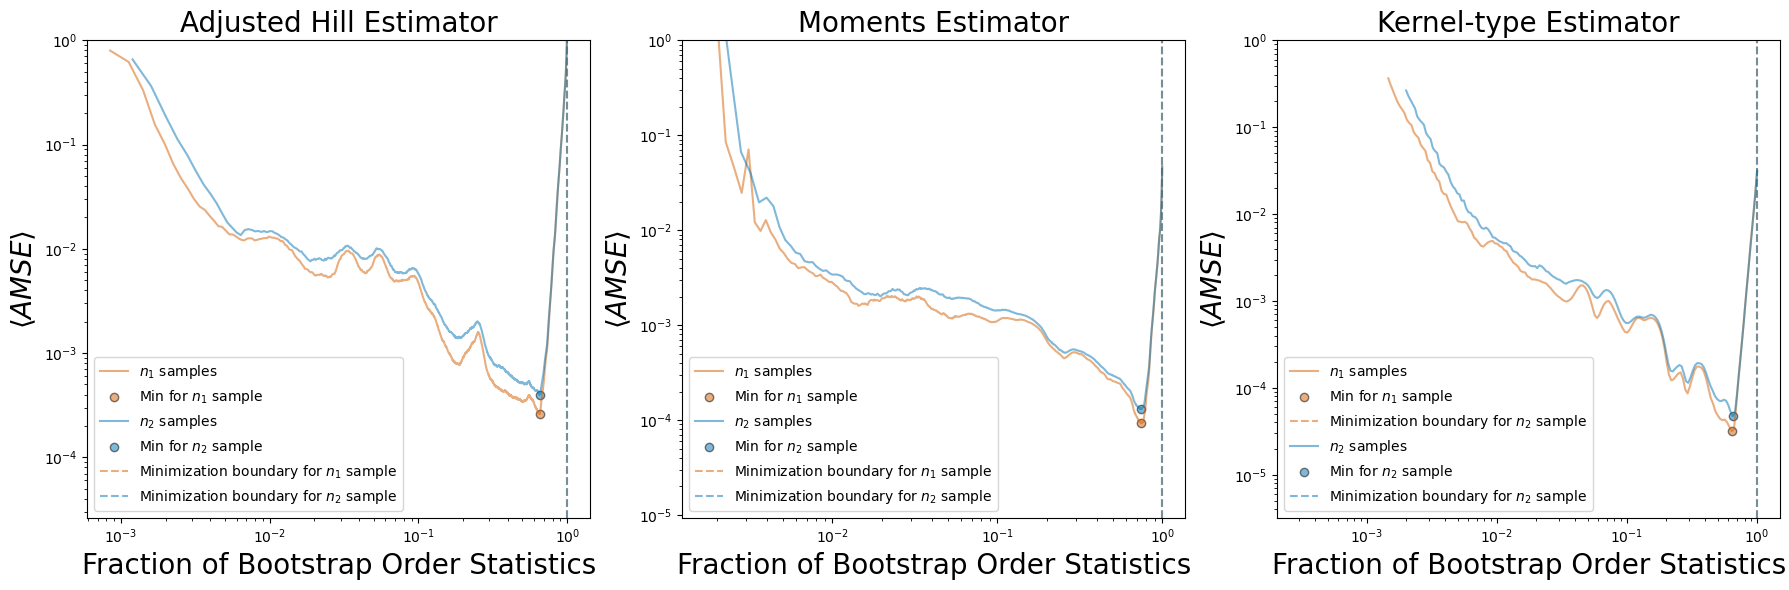

In [20]:
# Diagnostic plots
estim_set.plot_diagnostics()
plt.show()